# Assignment 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [15]:
# Read the files 
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')



In [17]:
# Display the first few rows of customers

customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [18]:
# Display the first few rows of products

products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [19]:
# Display the first few rows of transactions

transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [21]:
# basic info for each dataset

customers_info = customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [23]:
# basic info for dataset

customers_info = products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [22]:
# basic info for dataset

customers_info = transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [24]:
# Convert date columns to datetime format for easier analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets for a unified view
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left').merge(products_df, on='ProductID', how='left')

# Generate basic statistics
customers_stats = customers_df.describe(include='all')
products_stats = products_df.describe(include='all')
transactions_stats = transactions_df.describe(include='all')
merged_stats = merged_df.describe(include='all')

# Check for missing values in the merged dataset
missing_values = merged_df.isnull().sum()

# Output basic stats and missing values
customers_stats, products_stats, transactions_stats, merged_stats, missing_values


(       CustomerID      CustomerName         Region           SignupDate
 count         200               200            200                  200
 unique        200               200              4                  NaN
 top         C0001  Lawrence Carroll  South America                  NaN
 freq            1                 1             59                  NaN
 mean          NaN               NaN            NaN  2023-07-19 08:31:12
 min           NaN               NaN            NaN  2022-01-22 00:00:00
 25%           NaN               NaN            NaN  2022-09-26 12:00:00
 50%           NaN               NaN            NaN  2023-08-31 12:00:00
 75%           NaN               NaN            NaN  2024-04-12 12:00:00
 max           NaN               NaN            NaN  2024-12-28 00:00:00,
        ProductID            ProductName Category       Price
 count        100                    100      100  100.000000
 unique       100                     66        4         NaN
 top      

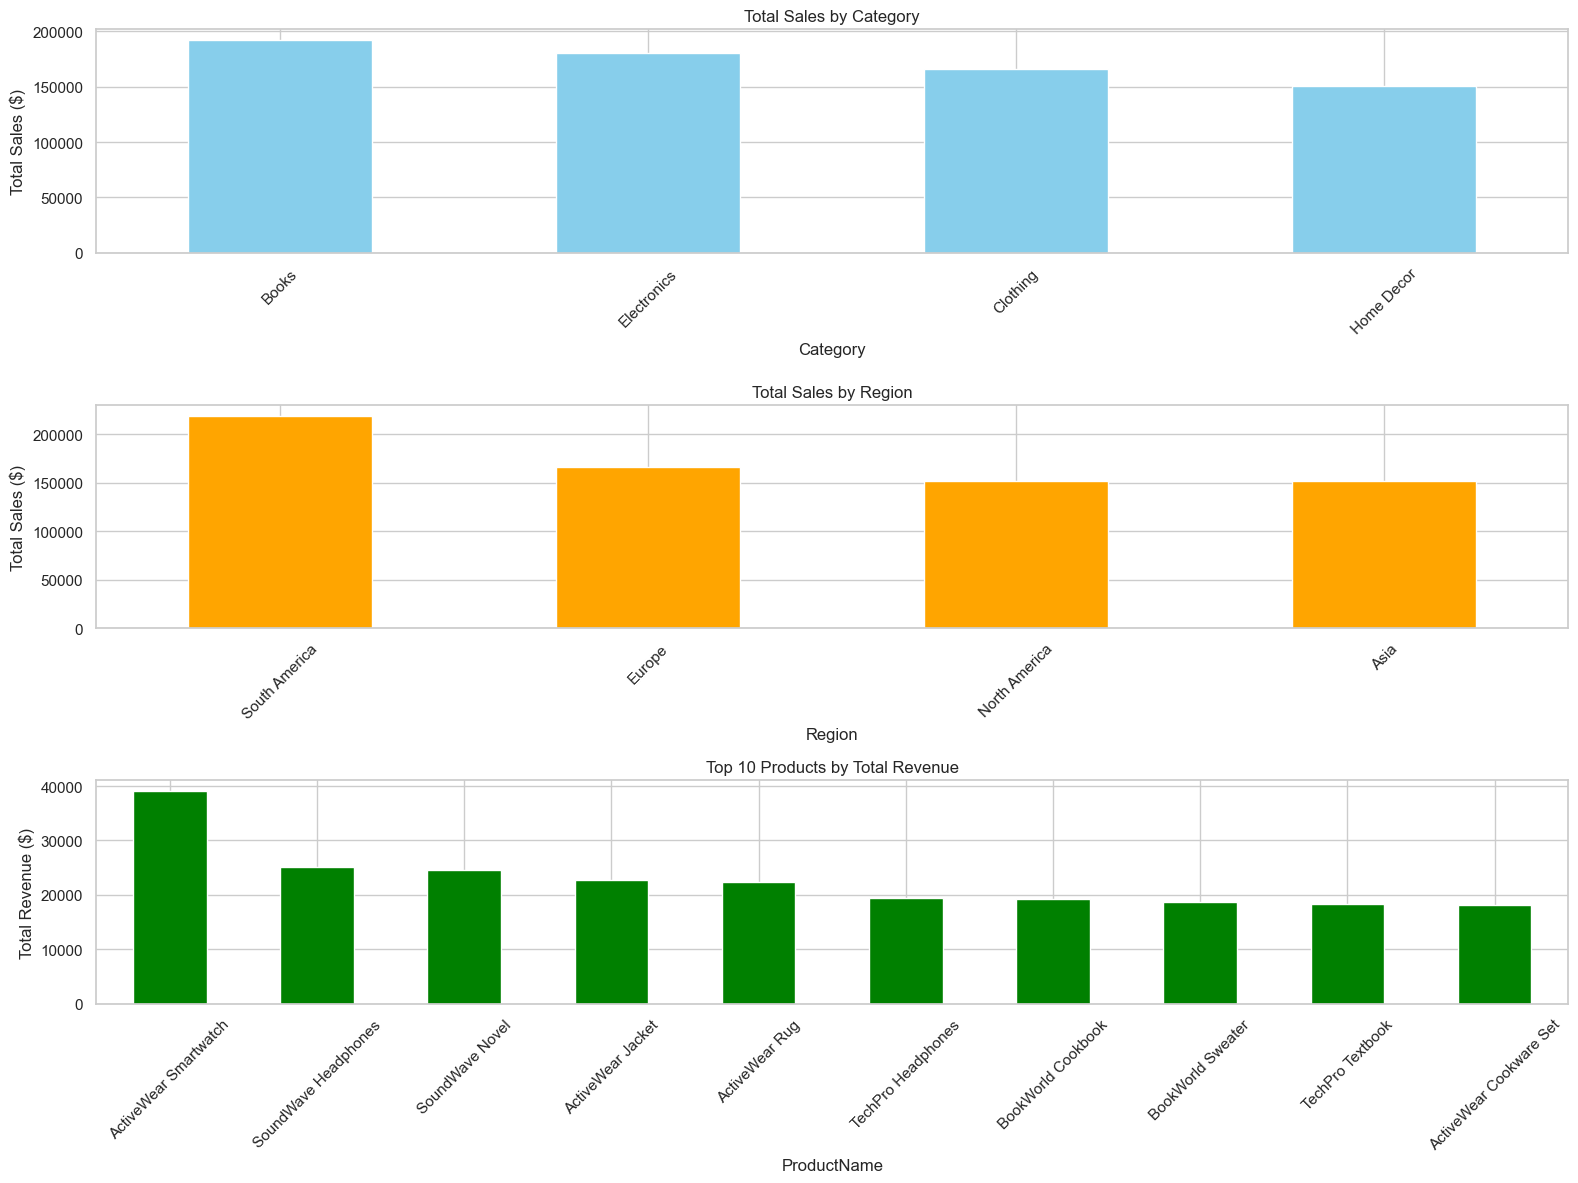

(Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 Region
 South America    219352.56
 Europe           166254.63
 North America    152313.40
 Asia             152074.97
 Name: TotalValue, dtype: float64,
 ProductName
 ActiveWear Smartwatch      39096.97
 SoundWave Headphones       25211.64
 SoundWave Novel            24507.90
 ActiveWear Jacket          22712.56
 ActiveWear Rug             22314.43
 TechPro Headphones         19513.80
 BookWorld Cookbook         19221.99
 BookWorld Sweater          18743.79
 TechPro Textbook           18267.96
 ActiveWear Cookware Set    18083.73
 Name: TotalValue, dtype: float64)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization aesthetics
sns.set(style="whitegrid", palette="muted")

# Analyze sales performance by category
sales_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Analyze regional performance
sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Analyze top products by revenue
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(16, 12))

# Sales by Category
plt.subplot(3, 1, 1)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)

# Sales by Region
plt.subplot(3, 1, 2)
sales_by_region.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)

# Top 10 Products by Revenue
plt.subplot(3, 1, 3)
top_products.plot(kind='bar', color='green')
plt.title("Top 10 Products by Total Revenue")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Provide summary statistics for these findings
sales_by_category, sales_by_region, top_products


### Summary of Insights:

### Sales by Category:

The top-performing category is Books with $192,147.47 in total sales, followed by Electronics ($180,783.50), Clothing ($166,170.66), and Home Decor ($150,893.93).

### Regional Sales:

South America leads with $219,352.56 in total sales, followed by Europe ($166,254.63), North America ($152,313.40), and Asia ($152,074.97).
Top 10 Products by Revenue:

The most revenue-generating product is the ActiveWear Smartwatch ($39,096.97), followed by SoundWave Headphones ($25,211.64) and SoundWave Novel ($24,507.90).

In [ ]:
# 2nd task

In [32]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


# read the csv files 
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# merged all the dataframes 
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left').merge(products_df, on='ProductID', how='left')


# Preprocessing - Create a customer-product matrix
customer_product_matrix = merged_df.pivot_table(index='CustomerID', 
                                           columns='ProductID', 
                                           values='Quantity', 
                                           aggfunc='sum', 
                                           fill_value=0)

# Normalize data
scaler = StandardScaler()
normalized_matrix = scaler.fit_transform(customer_product_matrix)

# Compute cosine similarity
similarity_matrix = cosine_similarity(normalized_matrix)

# Create a DataFrame for similarity scores
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=customer_product_matrix.index, 
                             columns=customer_product_matrix.index)

# Function to get top 3 similar customers for a given customer
def get_top_similar(customers_df, customer_id, top_n=3):
    similar_customers = customers_df[customer_id].sort_values(ascending=False)[1:top_n+1]
    return list(zip(similar_customers.index, similar_customers.values))

# Generate lookalikes for the first 20 customers
lookalike_map = {}
for customer_id in similarity_df.index[:20]:
    lookalike_map[customer_id] = get_top_similar(similarity_df, customer_id)

# Convert lookalike map to a DataFrame for CSV output
lookalike_list = []
for cust_id, lookalikes in lookalike_map.items():
    for lookalike_id, score in lookalikes:
        lookalike_list.append({'cust_id': cust_id, 'lookalike_id': lookalike_id, 'score': score})

lookalike_df = pd.DataFrame(lookalike_list)

# Save to CSV
lookalike_df.to_csv('Lookalike.csv', index=False)

print("Lookalike model output saved to Lookalike.csv.")


Lookalike model output saved to Lookalike.csv.


In [ ]:
# 3rd task


  CustomerID  TotalQuantity  TotalSpent  PurchaseFrequency
0      C0001             12     1391.67                  5
1      C0002             10      835.68                  4
2      C0003             14      782.83                  4
3      C0004             23     1925.09                  8
4      C0005              7      874.81                  3


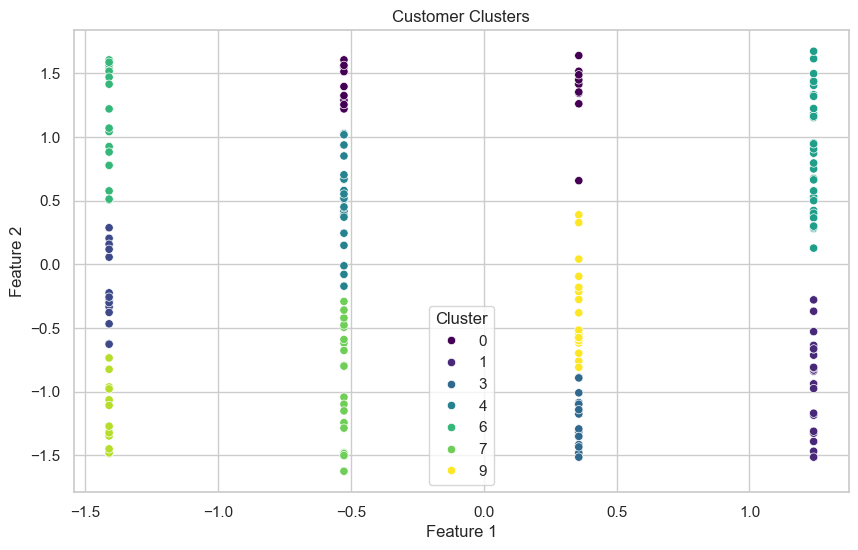

Clustering completed. Results saved to Clustering_Metrics.csv and Clustered_Customers.csv.


In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction data
transaction_agg = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Price': 'sum',
    'TransactionID': 'count'
}).reset_index()

# Renaming the columns
transaction_agg = transaction_agg.rename(columns={
    'Quantity': 'TotalQuantity',
    'Price': 'TotalSpent',
    'TransactionID': 'PurchaseFrequency'
})

print(transaction_agg.head())


# Merge with customer profile data
customer_data = customers.merge(transaction_agg, on='CustomerID', how='left').fillna(0)

# Select features for clustering
# Encode 'Region' as numerical values
label_encoder = LabelEncoder()
customer_data['RegionEncoded'] = label_encoder.fit_transform(customer_data['Region'])

# Convert 'SignupDate' to days since the signup (you can adjust this based on the current date)
customer_data['DaysSinceSignup'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['SignupDate'])).dt.days

# Select features for clustering
features = customer_data[['RegionEncoded', 'DaysSinceSignup']]



# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering and evaluation
cluster_results = []
for n_clusters in range(2, 11):
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, labels)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_features, labels)

    # Save results
    cluster_results.append({
        'n_clusters': n_clusters,
        'db_index': db_index,
        'silhouette_score': silhouette_avg
    })

# Convert results to DataFrame
results_df = pd.DataFrame(cluster_results)

# Best cluster based on DB Index
best_cluster = results_df.loc[results_df['db_index'].idxmin()]

# Final clustering with the best number of clusters
best_n_clusters = int(best_cluster['n_clusters'])
final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
customer_data['Cluster'] = final_labels

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=final_labels, palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Save clustering metrics and results
results_df.to_csv('Clustering_Metrics.csv', index=False)
customer_data.to_csv('Clustered_Customers.csv', index=False)

print("Clustering completed. Results saved to Clustering_Metrics.csv and Clustered_Customers.csv.")
